# Redes neuronales



## Importar librerias


In [ ]:
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
from random import randint
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

## Preparar conjunto de datos
Separar en entrenamiento y validación

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Crear copia para vizualización

In [ ]:
x_test_drawing = x_test.copy()

In [ ]:
x_test_drawing[0].shape

(28, 28)

## Revisión inicial del dataset

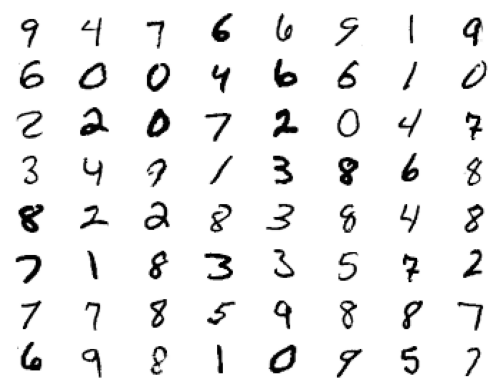

In [ ]:
for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    temp_img = np.reshape(x_test_drawing[randint(0, x_test_drawing.shape[0])], (28,28,1))
    plt.imshow(temp_img, cmap='Greys')

## Ajuste de información para entrada de la red neuronal

In [ ]:
## Revisión información de los datos
x_train.shape

(60000, 28, 28)

Imagenes de 28 x 28 al aplanar debe quedar arreglo de 784

In [ ]:
image_size =  (28, 28, 1) #1 siendo blanco y negro (matriz 28 x 28 = 784)

In [ ]:
# Normalizar los valores de los píxeles a [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Agregar una dimensión extra para canales (porque son imágenes negras)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)



In [ ]:
x_train.shape

(60000, 28, 28, 1)

Revisar datos esperados (y)

In [ ]:
y_train[0]

5

Convertir el arreglo entre a variables categoricas

In [ ]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

## Construcción de la Red Neuronal

El nombre de Tensorflow se deriva directamente de su marco principal: Tensor. En Tensorflow, todos los cálculos involucran tensores. Un tensor es un vector o matriz de n-dimensiones que representa todos los tipos de datos. Todos los valores de un tensor contienen un tipo de datos idéntico con una forma conocida (o parcialmente conocida). La forma de los datos es la dimensionalidad de la matriz o matriz.

https://www.tensorflow.org/guide/tensor

La capa de entrada requiere que se especifique el tamaño, las capas ocultas toman como valor de entrada la salida de la capa anterior (numero de neuronas), la capa de salida mediante la función de activación permite dar distinta funcionalidad a la red.

Cada capa requiere el numero de neuronas (units) y la función de activación

In [ ]:
model = Sequential([

    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),  # Capa convolucional 1
    MaxPooling2D(pool_size=(2,2)),  # Pooling 1
    Conv2D(64, (3,3), activation='relu'),  # Capa convolucional 2
    MaxPooling2D(pool_size=(2,2)),  # Pooling 2
    Flatten(),  # Aplanar la salida para conectarla con capas densas

    Dense(128, activation='relu'),  # Capa oculta
    Dense(10, activation='softmax')  # Capa de salida con 10 neuronas (una por cada dígito)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Ver resumen de la red

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## Entrenar la red

Debe escoger como optimizará la red, que función de perdidad usará y como determina el desempeño de la red

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.01)

In [ ]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

Momento de entrenar el modelo, no es mágia... son matemáticas!!

In [ ]:
history = model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=2, validation_split=.1)

Epoch 1/10
422/422 - 44s - 104ms/step - accuracy: 0.6902 - loss: 1.2205 - val_accuracy: 0.9062 - val_loss: 0.3379
Epoch 2/10
422/422 - 41s - 98ms/step - accuracy: 0.8974 - loss: 0.3440 - val_accuracy: 0.9327 - val_loss: 0.2295
Epoch 3/10
422/422 - 85s - 202ms/step - accuracy: 0.9245 - loss: 0.2507 - val_accuracy: 0.9548 - val_loss: 0.1708
Epoch 4/10
422/422 - 78s - 184ms/step - accuracy: 0.9404 - loss: 0.1988 - val_accuracy: 0.9590 - val_loss: 0.1494
Epoch 5/10
422/422 - 41s - 97ms/step - accuracy: 0.9509 - loss: 0.1651 - val_accuracy: 0.9677 - val_loss: 0.1206
Epoch 6/10
422/422 - 83s - 197ms/step - accuracy: 0.9579 - loss: 0.1415 - val_accuracy: 0.9700 - val_loss: 0.1175
Epoch 7/10
422/422 - 89s - 210ms/step - accuracy: 0.9625 - loss: 0.1241 - val_accuracy: 0.9738 - val_loss: 0.0979
Epoch 8/10
422/422 - 74s - 176ms/step - accuracy: 0.9666 - loss: 0.1117 - val_accuracy: 0.9733 - val_loss: 0.0957
Epoch 9/10
422/422 - 82s - 195ms/step - accuracy: 0.9695 - loss: 0.1026 - val_accuracy: 0.

In [ ]:
# history.history

Evaluar el resultado del entrenamiento

In [ ]:
#sin convoluciones

loss, accuracy  = model.evaluate(x_test, y_test, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9181 - loss: 0.2697


In [ ]:
#convolucionada

loss, accuracy  = model.evaluate(x_test, y_test, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9683 - loss: 0.1049


Visualizar resultados

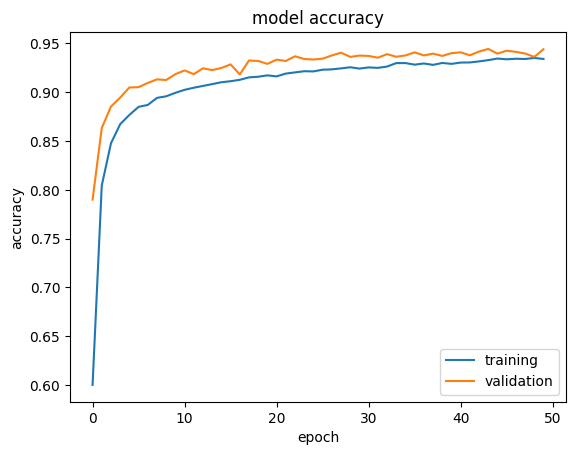

Test loss: 0.244
Test accuracy: 0.927


In [ ]:
#ANTES DE HACER LA CONVOLUCION


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

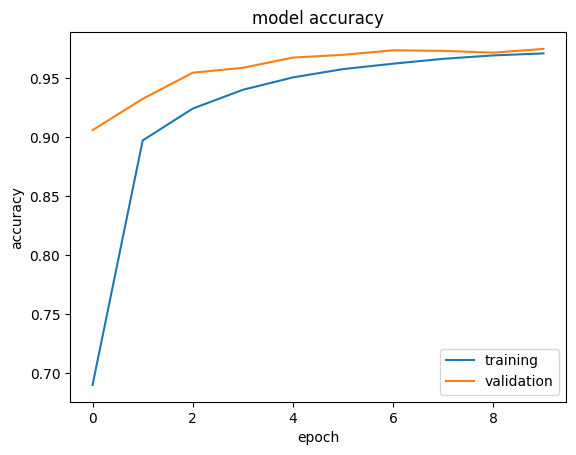

Test loss: 0.0914
Test accuracy: 0.972


In [ ]:
#despues de hacer la convolucion

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

## Realizar predicciones de imágenes ya convoluionadas


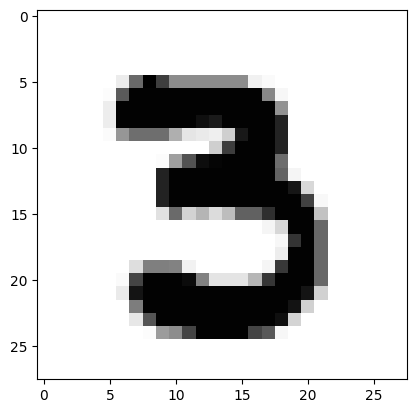

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Predicted Number:  3
Number Labeled as:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [ ]:
test_img = randint(0,x_test_drawing.shape[0])
X_test_img = x_test_drawing[test_img]
plt.imshow(X_test_img, cmap='Greys')
plt.show()
prediction = model.predict(x_test_drawing[test_img].reshape(1, 28, 28, 1))
print('Predicted Number: ', prediction.argmax())
print('Number Labeled as: ', y_test[test_img])

Autor: Cristian Diaz